                                                  Part-1

Learning Rate: Used to limit the amount each coefficient is corrected each time it is updated.   
Epochs: The number of times to run through the training data while updating the coefficients.




1. Start with 0 (zero ) value for  m & c .
2. Using cost function 
    $$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$
    where $(h_\theta(x^{(i)})$ is prediction for present iteration

    
3. Find the values of $\theta_1$ & $\theta_0$ by updating the values with learning rate of 0.005, 0.0005 etc and epoch value 100,500,1000, etc.
4. Stop the iterations when error falls below threshold.


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.txt',sep="\t",header=None,skiprows=1)
data.columns = ['Birth rate','Life expectancy']
#data.head()

In [65]:
#plt.plot(data.iloc[:,0],data.iloc[:,1],'ro')

In [66]:
#data['Birth rate']

In [67]:
X=np.c_[np.ones(data.shape[0]),data['Birth rate']]
#X

In [68]:
y = np.array(data['Life expectancy'])
y = np.reshape(y, (190,1))
#y.shape

In [69]:
def h(X,theta):
    return (X @ theta)

In [70]:
def gradientDescent(X, y, theta, alpha, itern):
    m=np.size(y)
    J=[]
    for i in range(itern):
        theta=theta - (alpha/m)*   (X.T @  (h(X, theta)-y)  )
        J.append((np.sum((X @ theta)-y)**2)/(2*m))
    return theta, J

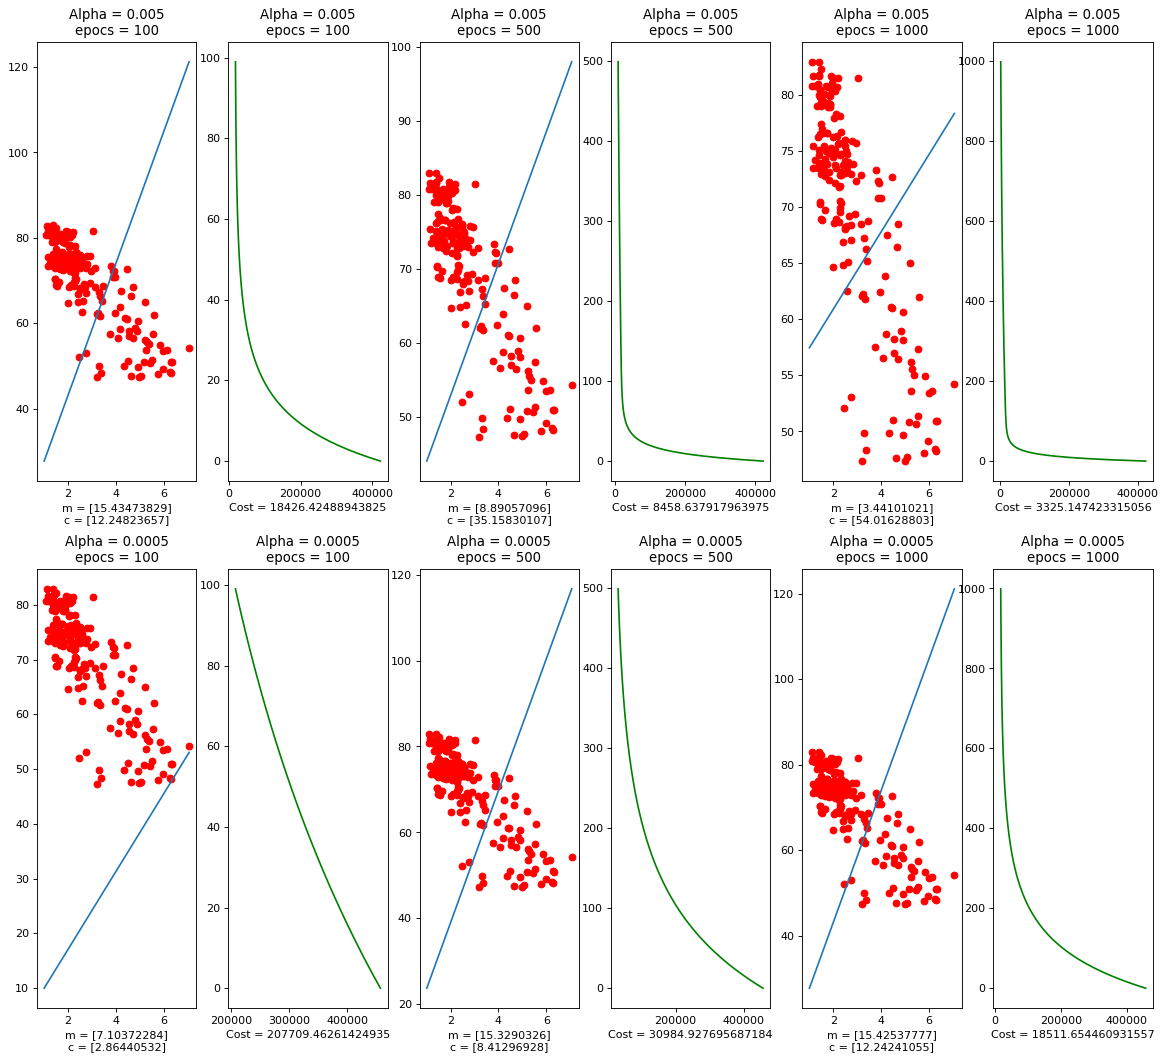

In [71]:

m=np.size(y)
alpha = [0.005, 0.0005]
epocs = [100, 500, 1000]
xs = np.linspace(np.min(X),np.max(X),2)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i in range(len(alpha)):
    for j in range(len(epocs)):
        theta = np.zeros([2,1])
        theta, J =gradientDescent(X,y,theta, alpha=alpha[i], itern=epocs[j])
        
        plt.subplot(2, 6, 6*i+2*j+1)
        plt.plot(X[:,1],y,'ro')
        plt.xlabel("m = {}\nc = {}".format(theta[1], theta[0]))
        ys = theta[0]+xs*theta[1]
        plt.title("Alpha = {}\nepocs = {}".format(alpha[i], epocs[j]))
        plt.plot(xs,ys)
        
        plt.subplot(2, 6, 6*i+2*j+2)
        plt.xlabel("Cost = {}".format(J[-1]))
        plt.title("Alpha = {}\nepocs = {}".format(alpha[i], epocs[j]))
        plt.plot(J,range(epocs[j]),'g')
        


                                                   Part 2
1. Display the graph of decreasing cost function against learning rate and epoch.
2. Compare time complexity of all the three approach.
3. Start with random values of $\theta_1$ & $\theta_0$ and analyse best approach for initial values of $\theta_1$ & $\theta_0$.

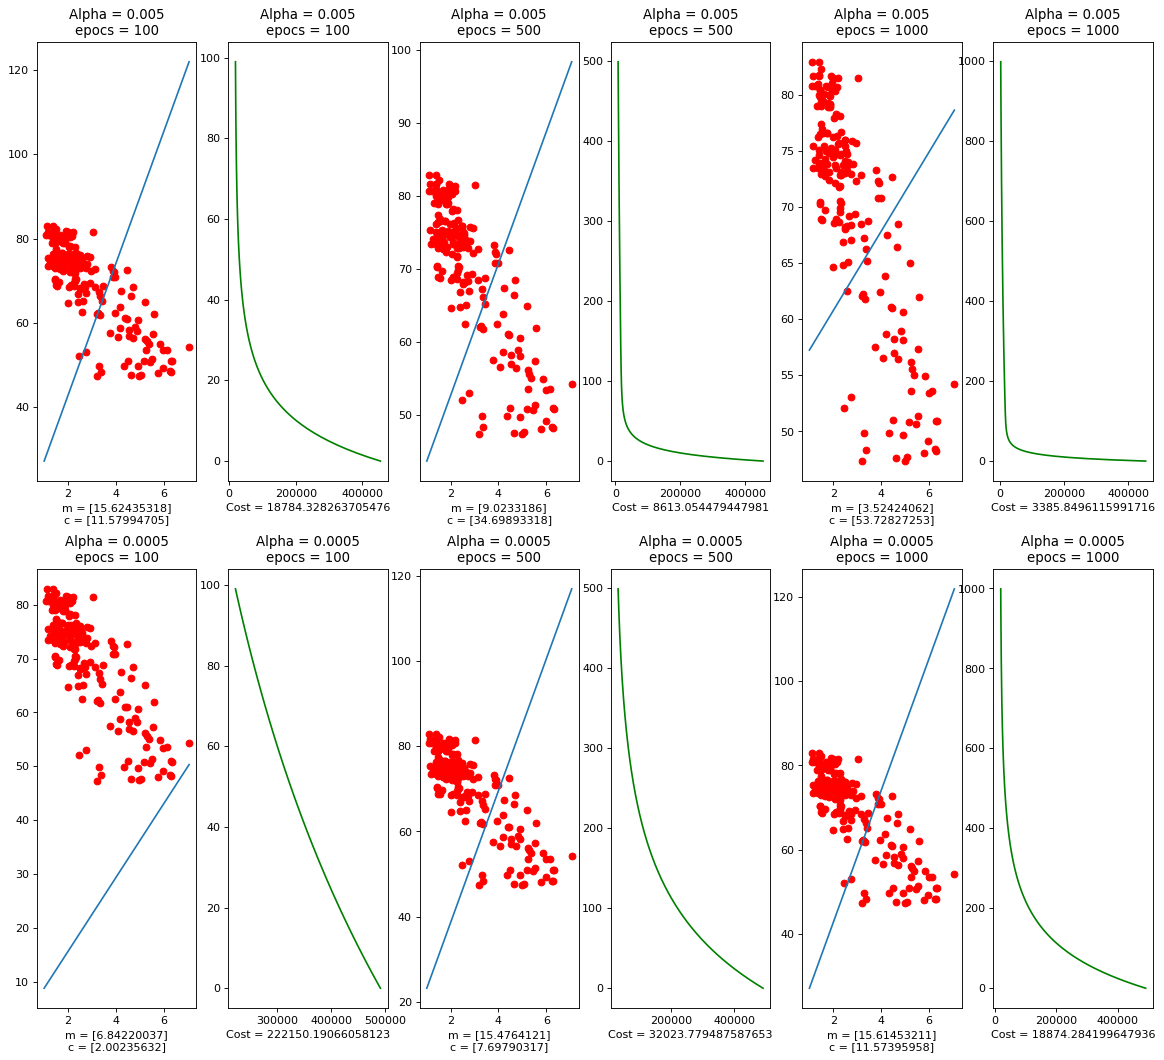

In [72]:
m=np.size(y)
alpha = [0.005, 0.0005]
epocs = [100, 500, 1000]
xs = np.linspace(np.min(X),np.max(X),2)
rand = np.random.randn(2,1)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i in range(len(alpha)):
    for j in range(len(epocs)):
        theta = rand
        theta, J =gradientDescent(X,y,theta, alpha=alpha[i], itern=epocs[j])
        
        plt.subplot(2, 6, 6*i+2*j+1)
        plt.plot(X[:,1],y,'ro')
        plt.xlabel("m = {}\nc = {}".format(theta[1], theta[0]))
        ys = theta[0]+xs*theta[1]
        plt.title("Alpha = {}\nepocs = {}".format(alpha[i], epocs[j]))
        plt.plot(xs,ys)
        
        plt.subplot(2, 6, 6*i+2*j+2)
        plt.xlabel("Cost = {}".format(J[-1]))
        plt.title("Alpha = {}\nepocs = {}".format(alpha[i], epocs[j]))
        plt.plot(J,range(epocs[j]),'g')

                                                   Part 3
1. Write analysis on how optimization was improved.
2. Implement one more new cost function.

1.) Optimisation was achieved by iteratively improving the hyperparameters and the initial approximation

2.) New cost function $$J(\theta) = \frac{1}{4m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^4$$
    where $(h_\theta(x^{(i)})$ is prediction for present iteration